In [1]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from custom_transformers.standard_true_false import standard_true_false

In [2]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]
    X_gpa = standard_true_false.fit_transform(DATA["X_gpa"])
    X_snps = standard_true_false.fit_transform(DATA["X_snps"])
    X_genexp = StandardScaler().fit_transform(DATA["X_genexp"])

In [3]:
X_gpa_genexp = np.concatenate([X_gpa, X_genexp], axis=1)
X_snps_genexp = np.concatenate([X_snps, X_genexp], axis=1)
X_gpa_snps = np.concatenate([X_gpa, X_snps], axis=1)
X_all = np.concatenate([X_gpa, X_snps, X_genexp], axis=1)

Y = pd.DataFrame(pheno.iloc[:, 1:])
Y = Y.set_index(pheno["strain_ids"])
Y = Y.fillna(-1)

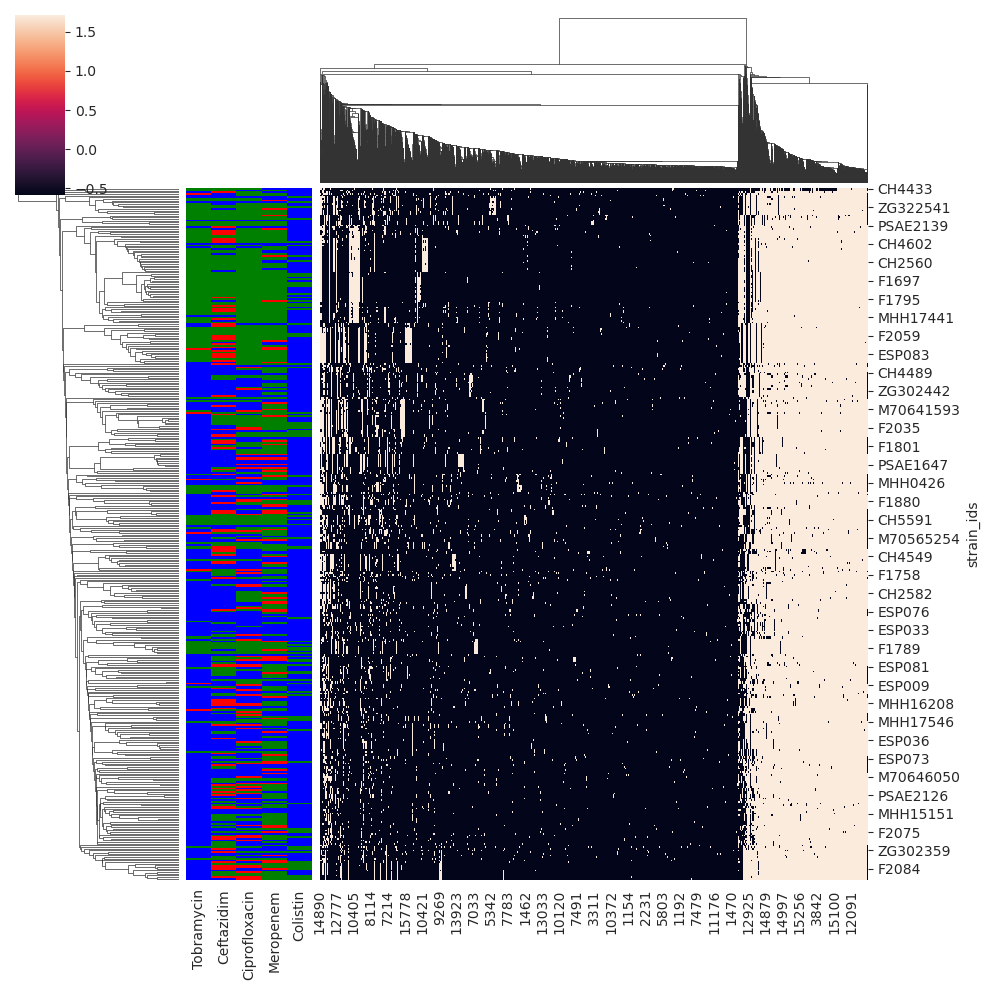

In [4]:
X = pd.DataFrame(X_gpa, index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)

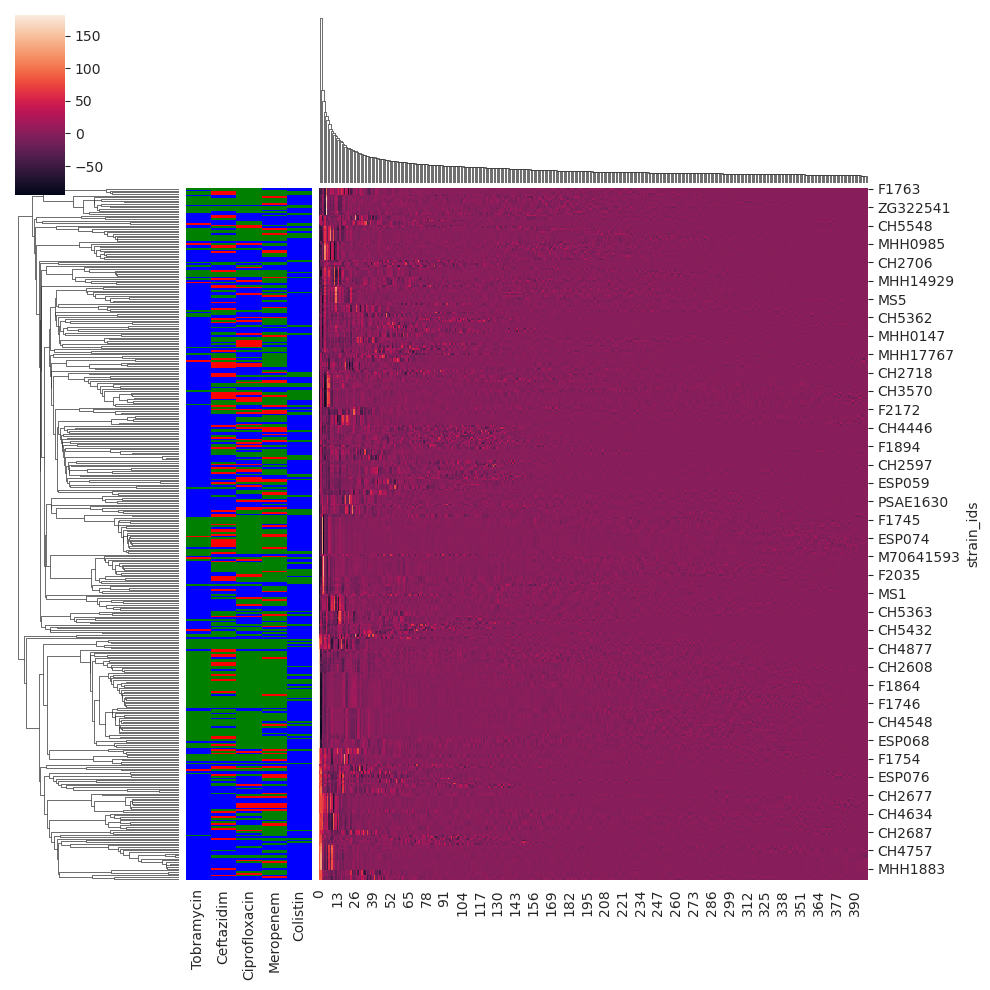

In [5]:
X = pd.DataFrame(PCA(n_components=400).fit_transform(X_snps), index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)

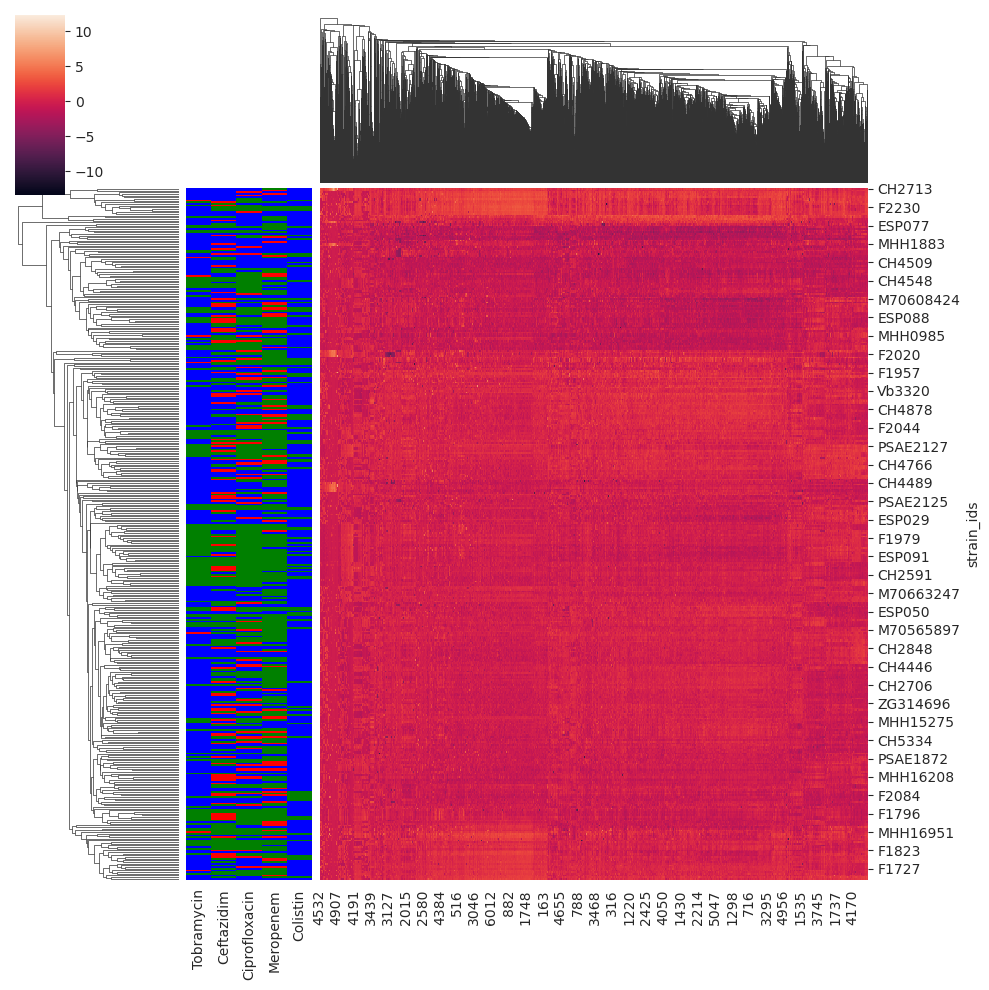

In [6]:
X = pd.DataFrame(X_genexp, index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)

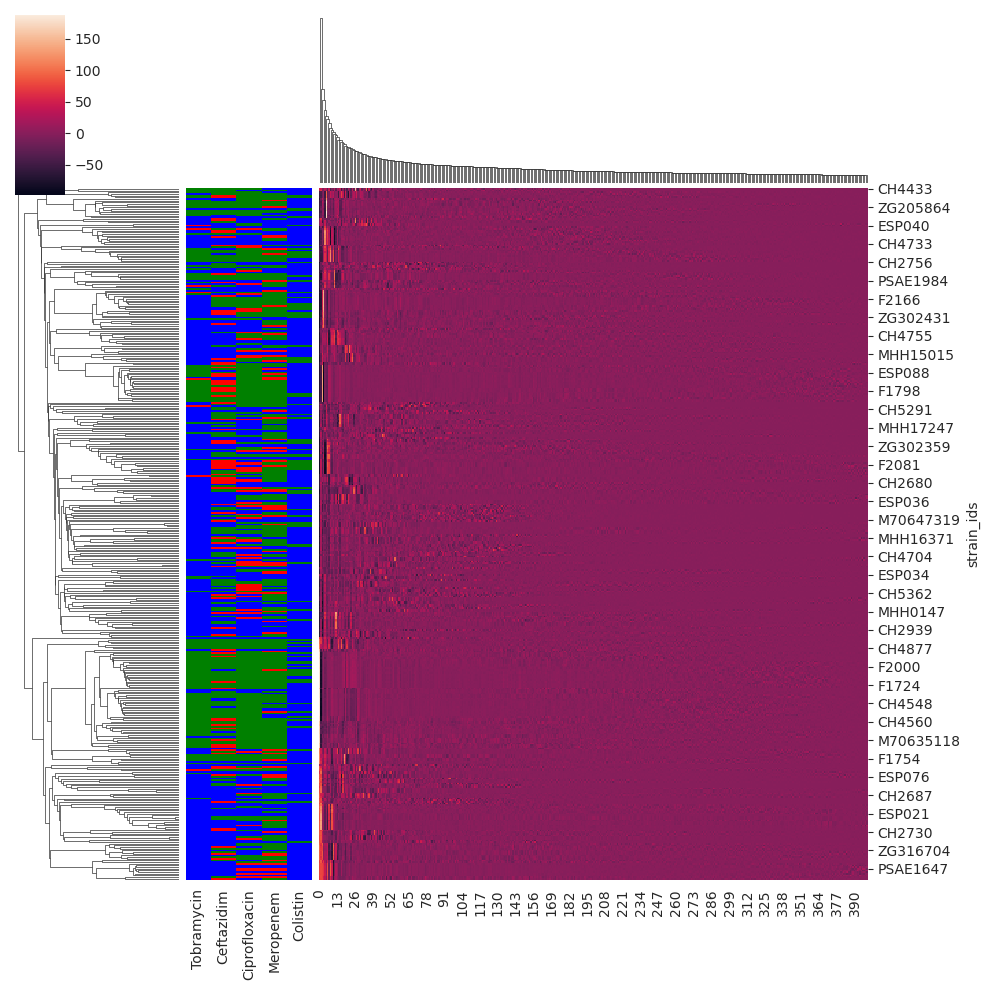

In [7]:
X = pd.DataFrame(PCA(n_components=400).fit_transform(X_gpa_snps), index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)

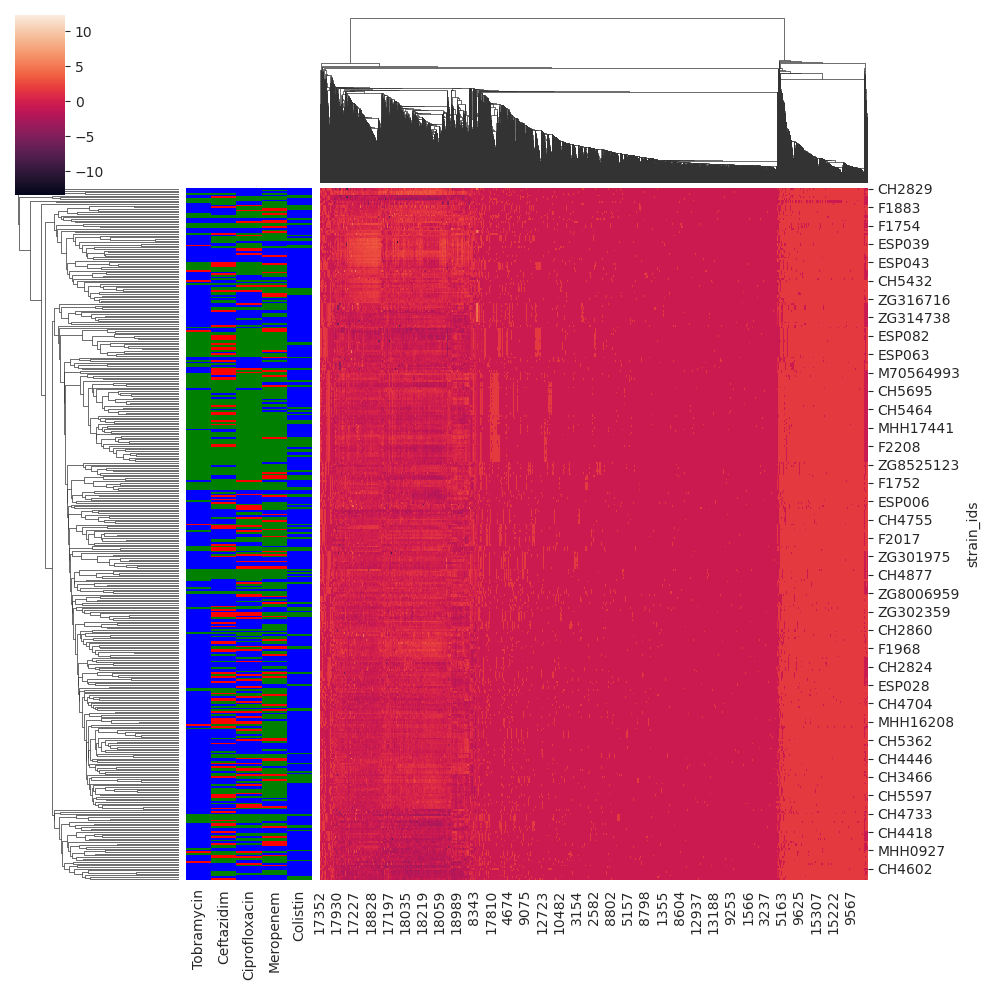

In [8]:
X = pd.DataFrame(X_gpa_genexp, index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)

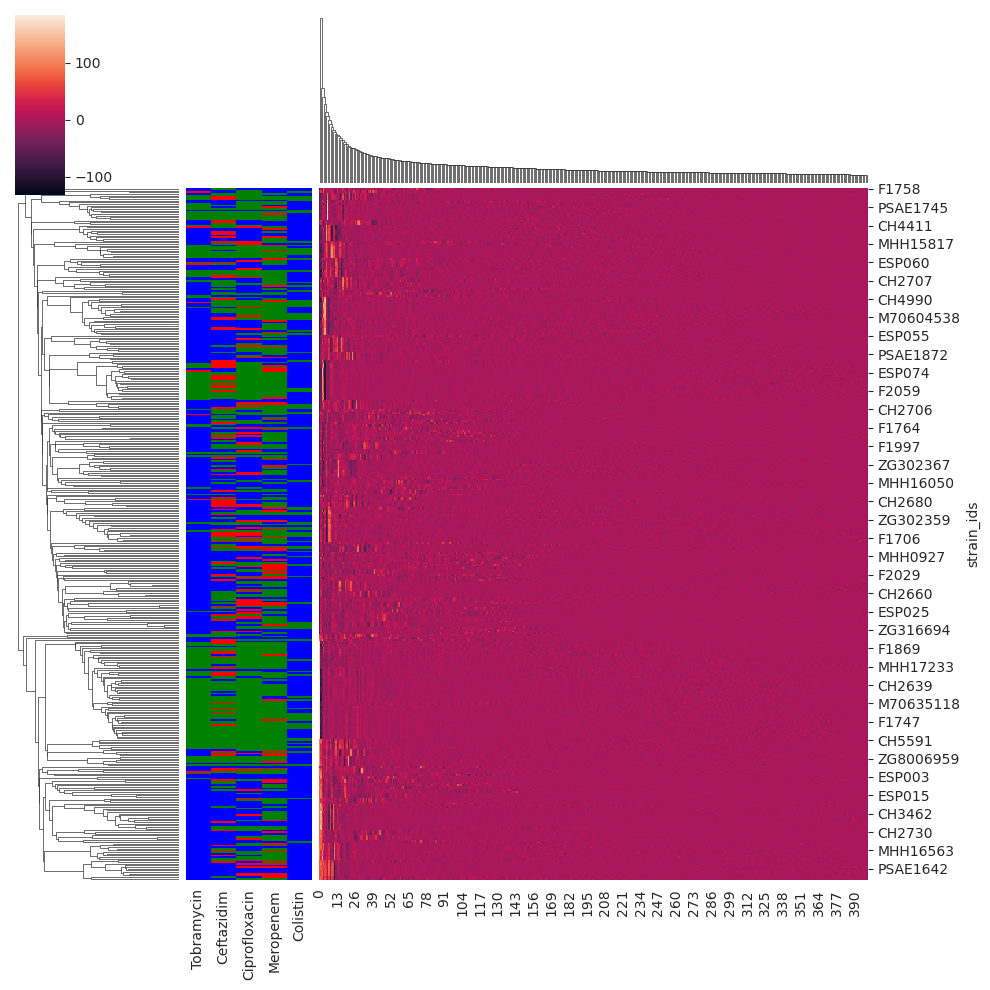

In [9]:
X = pd.DataFrame(PCA(n_components=400).fit_transform(X_snps_genexp), index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)

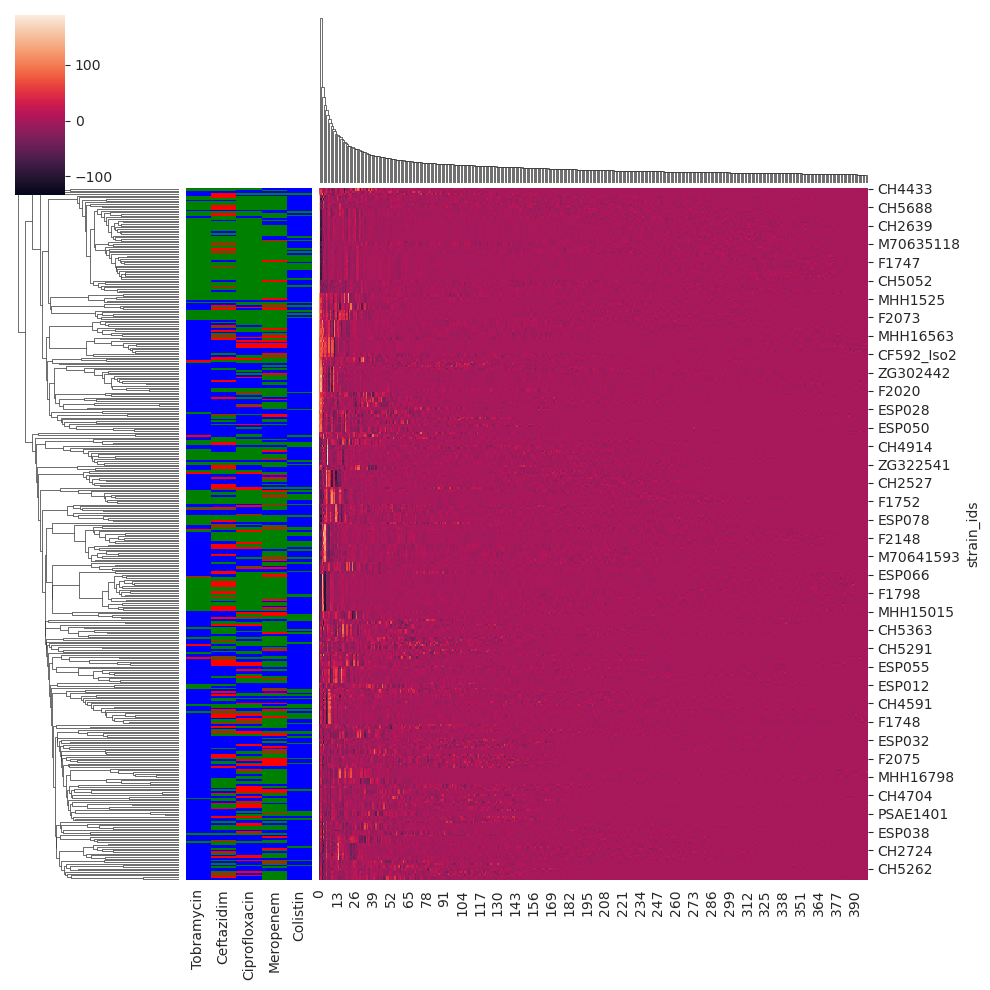

In [10]:
X = pd.DataFrame(PCA(n_components=400).fit_transform(X_all), index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)